In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read dataset

In [3]:
df=pd.read_csv("dirty_cafe_sales.csv")

In [4]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [6]:
df.shape

(10000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [9]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts(dropna=False))

Transaction ID
TXN_1961373    1
TXN_4831525    1
TXN_1228927    1
TXN_6486912    1
TXN_3447069    1
              ..
TXN_5680238    1
TXN_7766134    1
TXN_2617257    1
TXN_8993132    1
TXN_6170729    1
Name: count, Length: 10000, dtype: int64
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64
Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: count, dtype: int64
Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
NaN         179
UNKNOWN     164
Name: count, dtype: int64
Total Spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444

In [13]:
df.replace(['ERROR','UNKNOWN'],np.nan,inplace=True)

In [14]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,NaN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [16]:
df.drop(['Location'],axis=1,inplace=True)

In [17]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,2023-06-11
...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,2023-12-02


In [19]:
df.describe().T

,count,unique,top,freq
Transaction ID,10000,10000,TXN_1961373,1
Item,9031,8,Juice,1171
Quantity,9521,5,5,2013
Price Per Unit,9467,6,3.0,2429
Total Spent,9498,17,6.0,979
Payment Method,6822,3,Digital Wallet,2291
Transaction Date,9540,365,2023-02-06,40


In [22]:
import warnings
warnings.filterwarnings("ignore")
for i in ['Price Per Unit','Total Spent']:
    df[i]=df[i].astype("float64")
    df[i].fillna(df[i].mean(),inplace=True)

In [23]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date
0,TXN_1961373,Coffee,2,2.000000,4.000000,Credit Card,2023-09-08
1,TXN_4977031,Cake,4,3.000000,12.000000,Cash,2023-05-16
2,TXN_4271903,Cookie,4,1.000000,8.924352,Credit Card,2023-07-19
3,TXN_7034554,Salad,2,5.000000,10.000000,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.000000,4.000000,Digital Wallet,2023-06-11
...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.000000,4.000000,NaN,2023-08-30
9996,TXN_9659401,NaN,3,2.949984,3.000000,Digital Wallet,2023-06-02
9997,TXN_5255387,Coffee,4,2.000000,8.000000,Digital Wallet,2023-03-02
9998,TXN_7695629,Cookie,3,2.949984,3.000000,Digital Wallet,2023-12-02


In [36]:
#categorical we can fill in mode
df["Item"].fillna(df["Item"].mode()[0],inplace=True)
df["Payment Method"].fillna(df["Payment Method"].mode()[0],inplace=True)

In [37]:
df['Quantity']=df['Quantity'].astype("float64")
df['Quantity'].fillna(df['Quantity'].median(),inplace=True)

In [49]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in ['Item','Payment Method']:
    df[i+'_LE']=label.fit_transform(df[[i]])

In [50]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Item_LE,Payment Method_LE
0,TXN_1961373,Coffee,2.0,2.000000,4.000000,Digital Wallet,2023-09-08,1,2
1,TXN_4977031,Cake,4.0,3.000000,12.000000,Cash,2023-05-16,0,0
2,TXN_4271903,Cookie,4.0,1.000000,8.924352,Digital Wallet,2023-07-19,2,2
3,TXN_7034554,Salad,2.0,5.000000,10.000000,Credit Card,2023-04-27,4,1
4,TXN_3160411,Coffee,2.0,2.000000,4.000000,Credit Card,2023-06-11,1,1
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.000000,4.000000,Credit Card,2023-08-30,1,1
9996,TXN_9659401,Juice,3.0,2.949984,3.000000,Credit Card,2023-06-02,3,1
9997,TXN_5255387,Coffee,4.0,2.000000,8.000000,Credit Card,2023-03-02,1,1
9998,TXN_7695629,Cookie,3.0,2.949984,3.000000,Credit Card,2023-12-02,2,1


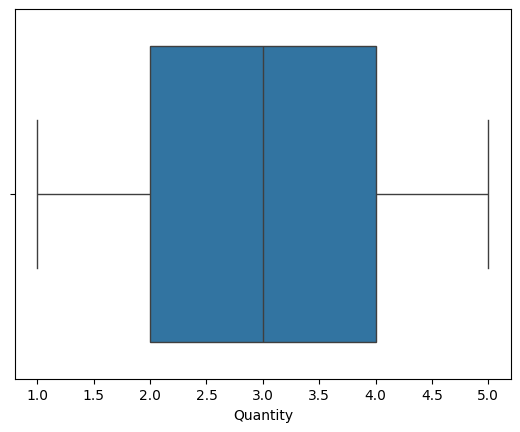

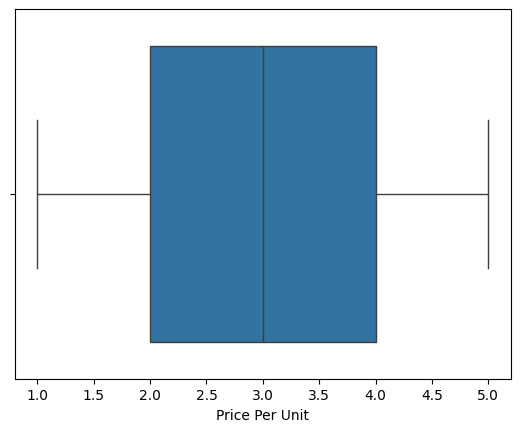

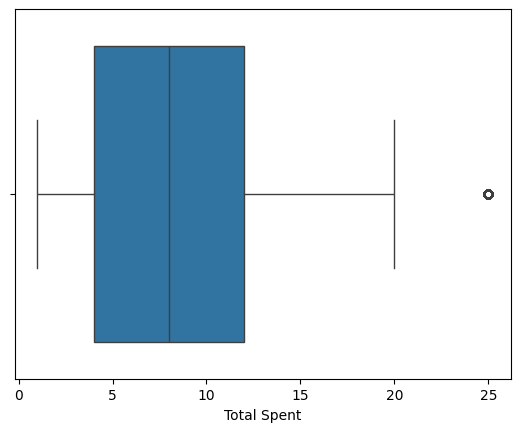

In [52]:
import warnings
warnings.filterwarnings("ignore")
for i in ['Quantity','Price Per Unit','Total Spent']: #outlier in Total Spent
    sns.boxplot(data=df,x=i)
    plt.show()

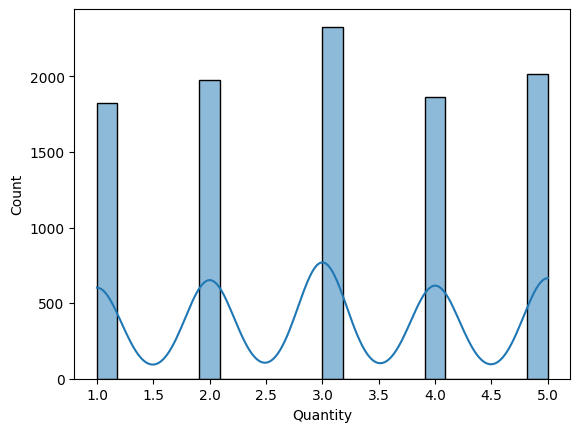

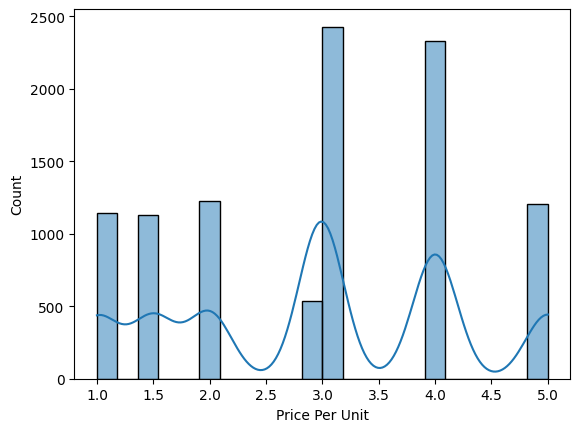

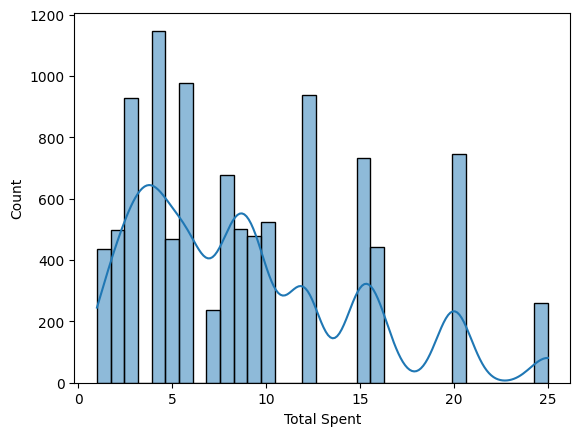

In [54]:
import warnings
warnings.filterwarnings("ignore")
for i in ['Quantity','Price Per Unit','Total Spent']: 
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

In [67]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

lw,uw=wisker(df['Total Spent'])
df['Total Spent']=np.where(df['Total Spent']<lw,lw,df['Total Spent'])
df['Total Spent']=np.where(df['Total Spent']>uw,uw,df['Total Spent'])

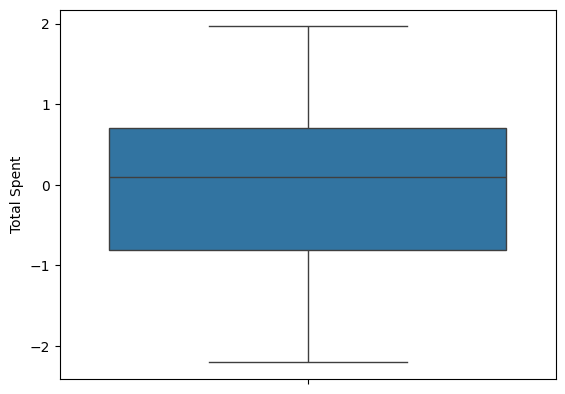

In [68]:
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(df['Total Spent'])
plt.show()

In [75]:
df['Transaction ID']=df['Transaction ID'].str.replace('TXN_','',)
df['Transaction ID']=pd.to_numeric(df['Transaction ID'],errors='coerce')

In [76]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Item_LE,Payment Method_LE
0,1961373,Coffee,-0.683419,-0.722315,-0.805458,Digital Wallet,2023-09-08,1,2
1,4977031,Cake,0.727112,0.099809,0.698247,Cash,2023-05-16,0,0
2,4271903,Cookie,0.727112,-1.669758,0.250868,Digital Wallet,2023-07-19,2,2
3,7034554,Salad,-0.683419,1.551811,0.418812,Credit Card,2023-04-27,4,1
4,3160411,Coffee,-0.683419,-0.722315,-0.805458,Credit Card,2023-06-11,1,1
...,...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,-0.683419,-0.722315,-0.805458,Credit Card,2023-08-30,1,1
9996,9659401,Juice,0.059925,0.060652,-1.135305,Credit Card,2023-06-02,3,1
9997,5255387,Coffee,0.727112,-0.722315,0.094024,Credit Card,2023-03-02,1,1
9998,7695629,Cookie,0.059925,0.060652,-1.135305,Credit Card,2023-12-02,2,1


In [77]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'],errors='coerce')
df['Month']=df['Transaction Date'].dt.month

In [78]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Item_LE,Payment Method_LE,Month
0,1961373,Coffee,-0.683419,-0.722315,-0.805458,Digital Wallet,2023-09-08,1,2,9.0
1,4977031,Cake,0.727112,0.099809,0.698247,Cash,2023-05-16,0,0,5.0
2,4271903,Cookie,0.727112,-1.669758,0.250868,Digital Wallet,2023-07-19,2,2,7.0
3,7034554,Salad,-0.683419,1.551811,0.418812,Credit Card,2023-04-27,4,1,4.0
4,3160411,Coffee,-0.683419,-0.722315,-0.805458,Credit Card,2023-06-11,1,1,6.0
...,...,...,...,...,...,...,...,...,...,...
9995,7672686,Coffee,-0.683419,-0.722315,-0.805458,Credit Card,2023-08-30,1,1,8.0
9996,9659401,Juice,0.059925,0.060652,-1.135305,Credit Card,2023-06-02,3,1,6.0
9997,5255387,Coffee,0.727112,-0.722315,0.094024,Credit Card,2023-03-02,1,1,3.0
9998,7695629,Cookie,0.059925,0.060652,-1.135305,Credit Card,2023-12-02,2,1,12.0


In [ ]:
df=